# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [46]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [48]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [50]:
df_plot = df['job_title_short'].value_counts().to_frame()
df_plot

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


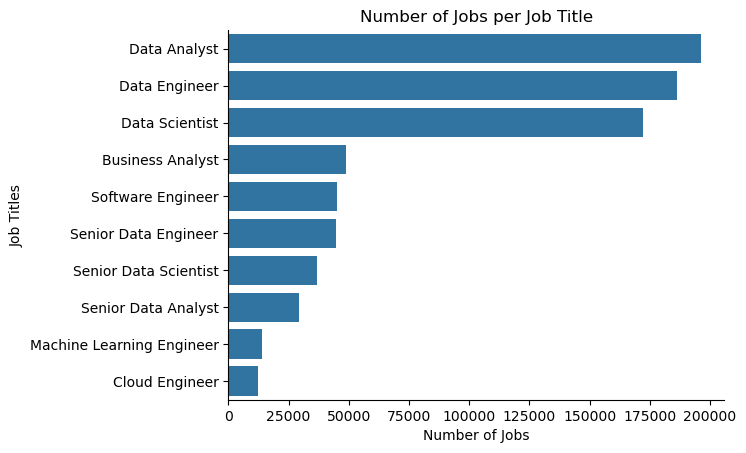

In [51]:
#Plotting job roles to explore
sns.barplot(data=df_plot, x='count', y='job_title_short')
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Titles')
plt.show()

### Countries to Explore

In [52]:
df_plot = df['job_country'].value_counts().to_frame().head(20)
df_plot

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


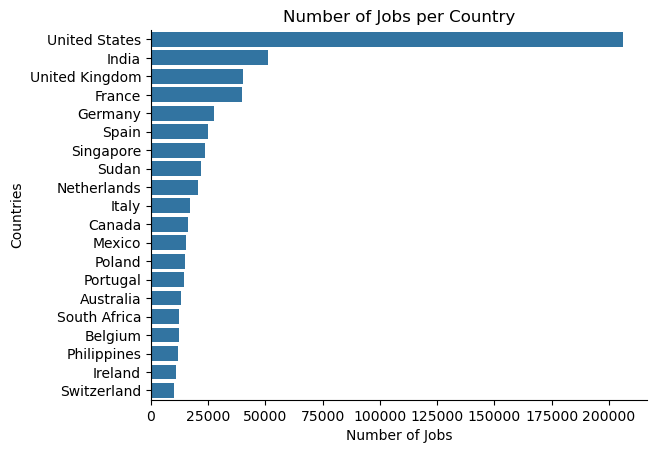

In [53]:
#Plotting countries to explore
sns.barplot(data=df_plot, x='count',y='job_country')
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('Countries')
plt.show()

### Companies to Explore

In [54]:
df_plot=df['company_name'].value_counts().to_frame().head(20)
df_plot

,count
company_name,
Emprego,6664
Booz Allen Hamilton,2879
Dice,2827
Harnham,2547
Insight Global,2254
Citi,2164
Confidenziale,2040
Listopro,1984
Capital One,1946


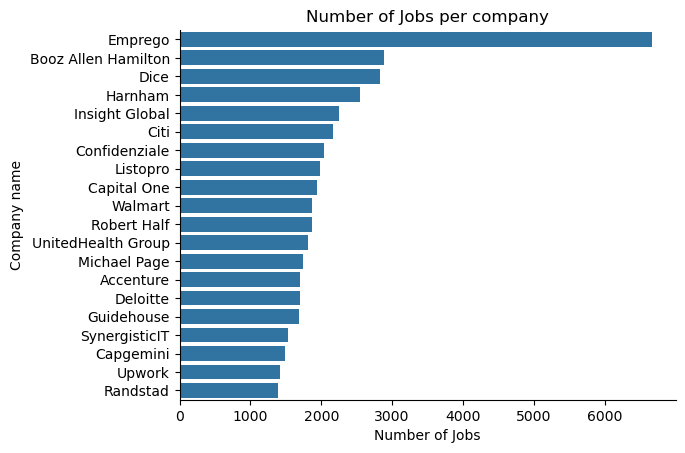

In [55]:
#Plotting companies to explore
sns.barplot(data=df_plot, x='count', y='company_name')
sns.despine()
plt.title('Number of Jobs per company')
plt.xlabel('Number of Jobs')
plt.ylabel('Company name')
plt.show()

### Job Perks

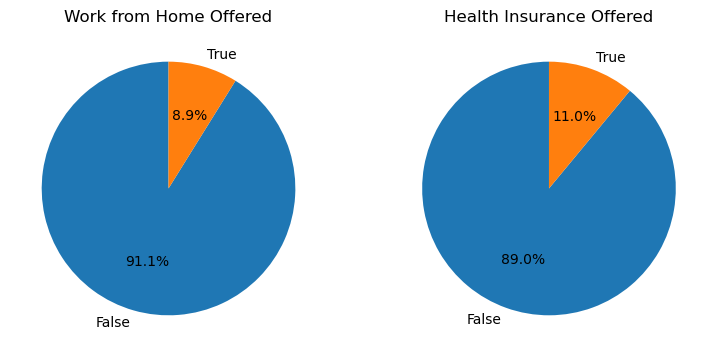

In [56]:
# Plotting pie charts for job perks offered
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_health_insurance': 'Health Insurance Offered'
}
fig, ax = plt.subplots(1, 2, figsize=(9, 4.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()


## Exploratory Data Analysis for Data Analysts in US

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [58]:
#Filtering Data
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short']== 'Data Analyst')]

### Locations to Explore:

In [59]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


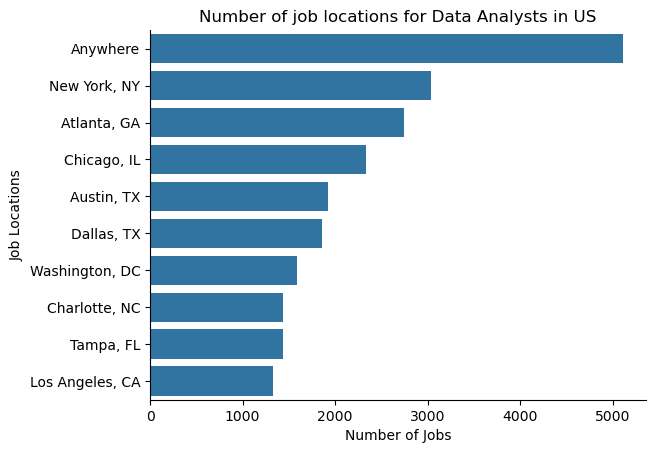

In [60]:
#Plotting locations to explore for Data Analysts in US
sns.barplot(data=df_plot, x='count', y='job_location')
sns.despine()
plt.title('Number of job locations for Data Analysts in US')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Locations')
plt.show()

### Job Perks 

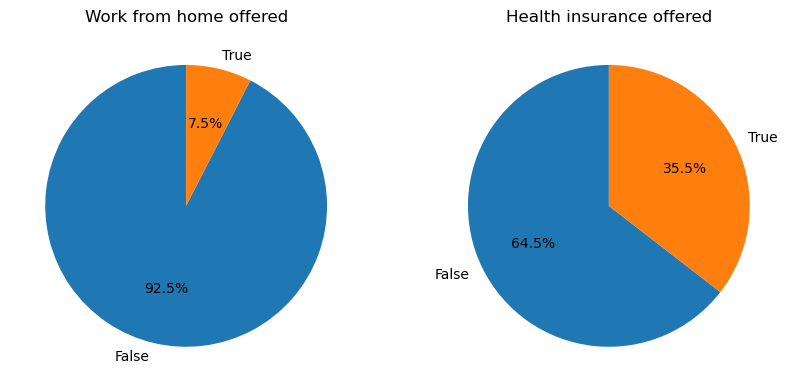

In [61]:
#Plotting pie charts for job perks offered
dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((10,6))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False','True'],autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()

### Companies to Explore:


In [62]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
df_plot

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


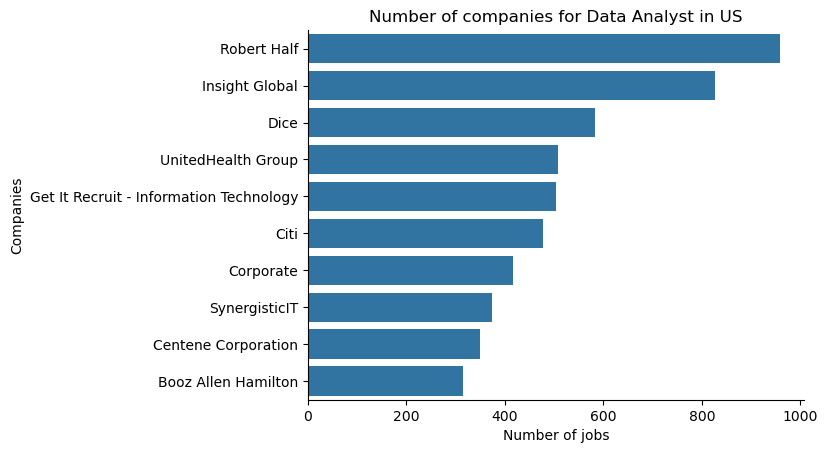

In [63]:
#Plotting companies to explore in US
sns.barplot(data=df_plot, x='count', y='company_name')
sns.despine()
plt.title('Number of companies for Data Analyst in US')
plt.xlabel('Number of jobs')
plt.ylabel('Companies')
plt.show()

## Exploratory Data Analysis for Data Analysts in India

In [64]:
#Filtering data
df_DA_IND = df[(df['job_country']=='India')&(df['job_title_short']=='Data Analyst')]

### Locations to Explore:

In [65]:
df_plot = df_DA_IND['job_location'].value_counts().to_frame()[1:].head(10)
df_plot

,count
job_location,
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106
"Secunderabad, Telangana, India",84


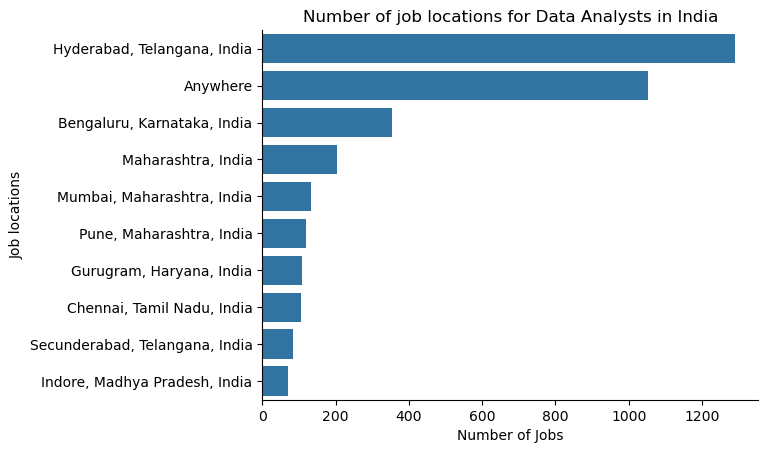

In [66]:
#Plotting locations to explore for Data Analysts in India

sns.barplot(data=df_plot, x='count', y='job_location')
sns.despine()
plt.title('Number of job locations for Data Analysts in India')
plt.xlabel('Number of Jobs')
plt.ylabel('Job locations')
plt.show()

### Job Perks 

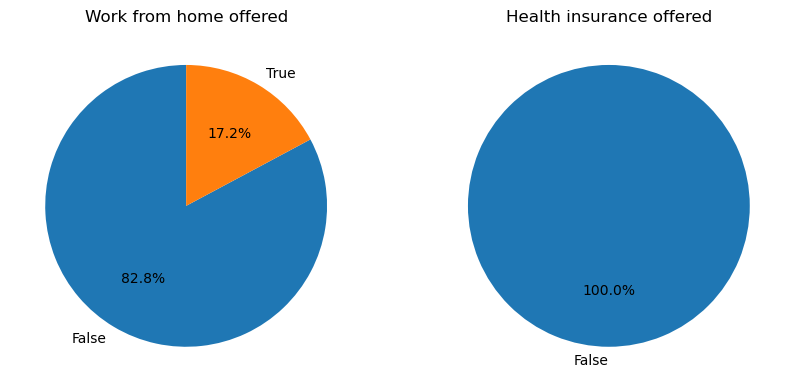

In [67]:
#Plotting pie charts for job perks offered in India
dict_column = {
    'job_work_from_home': "Work from home offered",
    'job_health_insurance': "Health insurance offered"
}

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,6)

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_IND[column].value_counts()
    labels = counts.index.astype(str)
    ax[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title) 
plt.show()

### Companies to Explore:


In [68]:
df_plot = df_DA_IND['company_name'].value_counts().to_frame().head(10)
df_plot

,count
company_name,
SAZ India,100
S&P Global,93
Confidential,82
Prometrics Solutions,72
PepsiCo,58
Maxgen Technologies Private Limited,57
JPMorgan Chase & Co.,53
JP Morgan Chase,51
Ovidtech Technologies,49


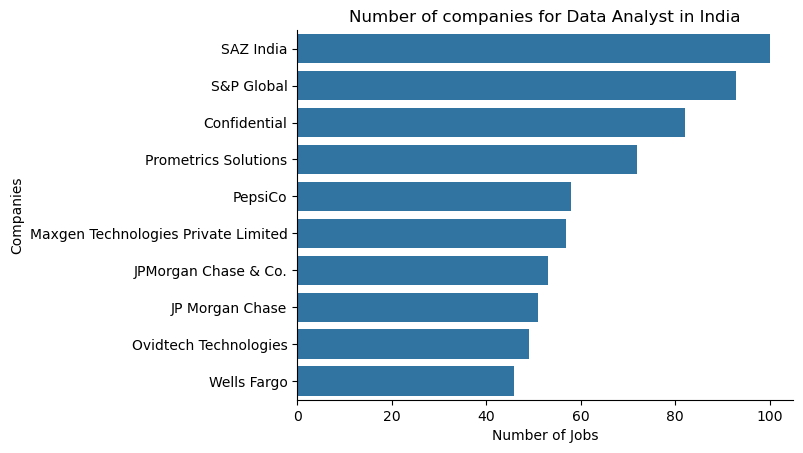

In [69]:
#Plotting companies to explore for Data Analysts in India
sns.barplot(data=df_plot, x='count', y='company_name')
sns.despine()
plt.title('Number of companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('Companies')
plt.show()